<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/Lec6_More_on_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series Propertis-Random Walk-White Noise**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
mydataraw = pd.read_csv("oilpriceindex.csv")

In [ ]:
mydataraw1 = mydataraw.copy()

In [ ]:
mydataraw.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,35.6,0.44
1,02-01-1990,22.11,19.81,35.6,2.45
2,03-01-1990,NaN,18.39,35.9,-0.28
3,04-01-1990,18.43,16.61,36.3,-6.18
4,05-01-1990,18.20,16.35,36.3,-1.62


In [ ]:
mydataraw.describe()

,WTI,BRENT,INR,NIFTY
count,360.000000,359.000000,357.000000,358.000000
mean,47.843528,49.330808,96.766106,0.193324
std,29.194188,32.860975,27.851830,1.890878
min,11.350000,9.820000,35.600000,-6.180000
25%,21.295000,19.755000,76.800000,-0.782500
50%,40.950000,41.580000,95.200000,0.185000
75%,68.397500,70.905000,113.900000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [ ]:
mydataraw.isna()

,DATE,WTI,BRENT,INR,NIFTY
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
356,False,False,False,False,False
357,False,False,False,False,False
358,False,False,False,False,False
359,False,False,False,False,False


In [ ]:
mydataraw.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [ ]:
mydataraw.NIFTY.isna().sum()

3

In [ ]:
mydataraw1.WTI = mydataraw1.WTI.fillna(method='ffill') 

In [ ]:
mydataraw1.isna().sum()

DATE     0
WTI      0
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [ ]:
mydataraw1.BRENT = mydataraw1.BRENT.fillna(method='bfill') 

In [ ]:
mydataraw1.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      4
NIFTY    3
dtype: int64

In [ ]:
mydataraw1.INR = mydataraw1.INR.fillna(method = 'ffill')

In [ ]:
mydataraw1.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      0
NIFTY    3
dtype: int64

In [ ]:
mydataraw1.NIFTY = mydataraw1.NIFTY.fillna(value = mydataraw.NIFTY.mean())

In [ ]:
mydataraw.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

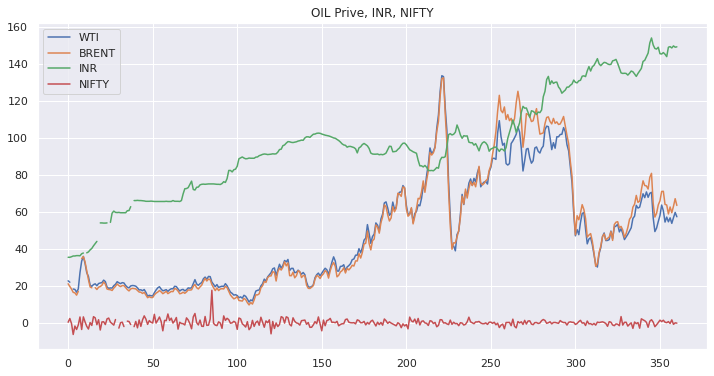

In [ ]:
mydataraw.plot(figsize = (12,6), title = "OIL Prive, INR, NIFTY")
plt.show()

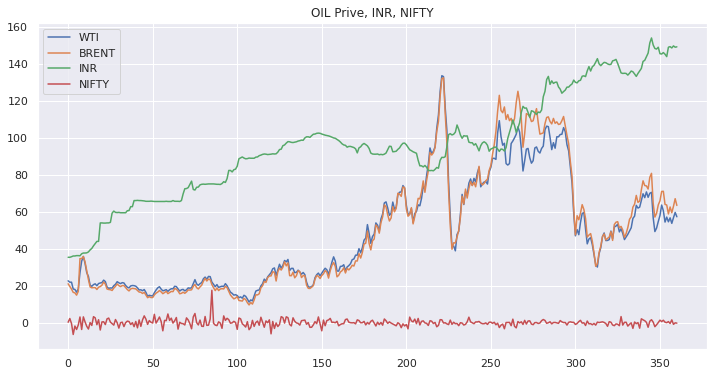

In [ ]:
mydataraw1.plot(figsize = (12,6), title = "OIL Prive, INR, NIFTY")

plt.show()

Quantile-Quantile Plot (QQ Plot)

In [ ]:
import scipy.stats
import pylab

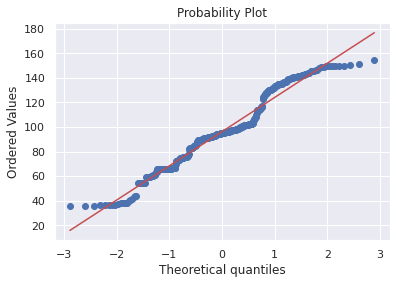

In [ ]:
scipy.stats.probplot(mydataraw1.INR, plot = pylab)
pylab.show()

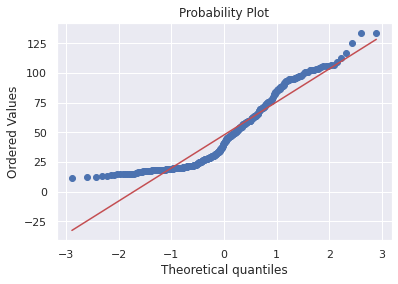

In [ ]:
scipy.stats.probplot(mydataraw1.WTI, plot = pylab)
pylab.show()

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
mydataraw1.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.207341,96.245983,0.193324
std,29.185056,32.816631,28.148450,1.882982
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.740000,75.500000,-0.760000
50%,40.780000,39.950000,95.100000,0.193324
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [ ]:
mydataraw1.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,35.6,0.44
1,02-01-1990,22.11,19.81,35.6,2.45
2,03-01-1990,22.11,18.39,35.9,-0.28
3,04-01-1990,18.43,16.61,36.3,-6.18
4,05-01-1990,18.20,16.35,36.3,-1.62


In [ ]:
mydataraw1.DATE.describe()

count            361
unique           361
top       12-01-2014
freq               1
Name: DATE, dtype: object

In [ ]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values=["null"], index_col='DATE', parse_dates= True, infer_datetime_format= True)

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [ ]:
mydatats.WTI = mydatats.WTI.fillna(method ='ffill')
mydatats.BRENT = mydatats.BRENT.fillna(method ='ffill')
mydatats.INR = mydatats.INR.fillna(method ='ffill')
mydatats.NIFTY = mydatats.NIFTY.fillna(method ='ffill')


**Create a duplicate variable**

In [ ]:
mydatats['INR_INR'] = mydatats.INR

In [ ]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,INR_INR
count,361.000000,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557,96.245983
std,29.185056,32.851631,28.148450,1.889088,28.148450
min,11.350000,9.820000,35.600000,-6.180000,35.600000
25%,21.300000,19.570000,75.500000,-0.790000,75.500000
50%,40.780000,39.950000,95.100000,0.180000,95.100000
75%,68.060000,70.760000,113.800000,1.080000,113.800000
max,133.880000,132.720000,154.300000,17.740000,154.300000


In [ ]:
del mydatats['INR_INR']

In [ ]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557
std,29.185056,32.851631,28.148450,1.889088
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.570000,75.500000,-0.790000
50%,40.780000,39.950000,95.100000,0.180000
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


Spliting the data set into Training and Testing using (iloc)

In [ ]:
len(mydatats)

361

In [ ]:
size =int(len(mydatats)*0.8)
mydatats_train = mydatats.iloc[:size]
mydatats_test = mydatats.iloc[size:]


In [ ]:
len(mydatats_train), len(mydatats_test)


(288, 73)

**White Noise**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import  seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,22.11,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [ ]:
white_noise = np.random.normal(loc = mydatats.INR.mean(), scale= mydatats.INR.std(), size= len(mydatats))
mydatats['WN_INR'] = white_noise

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR
DATE,,,,,
1990-01-01,22.86,21.25,35.6,0.44,107.557230
1990-02-01,22.11,19.81,35.6,2.45,49.406270
1990-03-01,22.11,18.39,35.9,-0.28,142.211481
1990-04-01,18.43,16.61,36.3,-6.18,58.524521
1990-05-01,18.20,16.35,36.3,-1.62,106.164035


In [ ]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,WN_INR
count,361.000000,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557,95.588982
std,29.185056,32.851631,28.148450,1.889088,29.421129
min,11.350000,9.820000,35.600000,-6.180000,2.913336
25%,21.300000,19.570000,75.500000,-0.790000,77.106557
50%,40.780000,39.950000,95.100000,0.180000,97.196157
75%,68.060000,70.760000,113.800000,1.080000,116.572757
max,133.880000,132.720000,154.300000,17.740000,165.236928


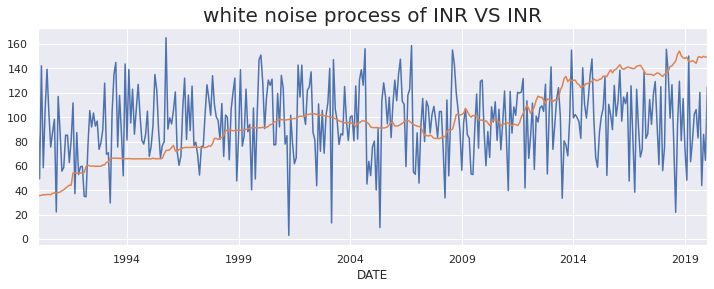

In [ ]:
mydatats.WN_INR.plot(figsize=(12,4))
mydatats.INR.plot(figsize = (12,4))
plt.title('white noise process of INR VS INR', size = 20)
plt.show()

**UNIT Root**

In [ ]:
sts.adfuller(mydatats.INR)

(-1.1290406537170836,
 0.7033530053152008,
 1,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1332.3497409741647)

INRt = alpha + beta1(INRt-1)

In [ ]:
sts.adfuller(mydatats.WN_INR)

(-17.707658702693593,
 3.513832853993874e-30,
 0,
 360,
 {'1%': -3.448645946352023,
  '10%': -2.5710650077160495,
  '5%': -2.869602139060357},
 3290.496752588122)

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR
DATE,,,,,
1990-01-01,22.86,21.25,35.6,0.44,107.557230
1990-02-01,22.11,19.81,35.6,2.45,49.406270
1990-03-01,22.11,18.39,35.9,-0.28,142.211481
1990-04-01,18.43,16.61,36.3,-6.18,58.524521
1990-05-01,18.20,16.35,36.3,-1.62,106.164035


**PCT**: ((Yt - Yt-1)/Yt-1) *100

In [ ]:
mydatats['INR_pct'] = mydatats.INR.pct_change(1).mul(100)
mydatats = mydatats.iloc[1:]

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct
DATE,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964


In [ ]:
mydatats['INR_diff']= mydatats.INR.diff().dropna()
mydatats['INR_diff']= mydatats.INR_diff.fillna(method='bfill')

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff
DATE,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,0.3
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,0.3
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,0.4
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,0.0
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,0.2


<function matplotlib.pyplot.tight_layout>

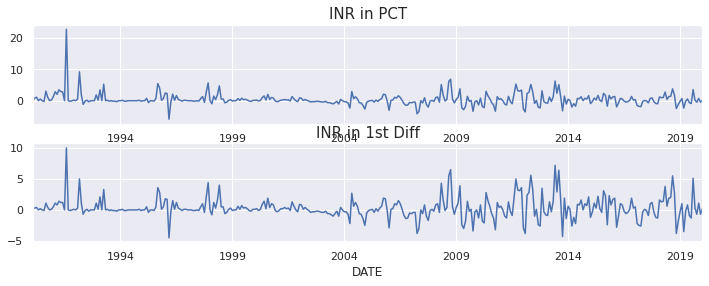

In [ ]:
plt.subplot(2, 1, 1)
mydatats.INR_pct.plot(figsize = (12,4))
plt.title("INR in PCT", size=15)

plt.subplot(2, 1, 2)
mydatats.INR_diff.plot(figsize = (12,4))
plt.title("INR in 1st Diff", size=15)
plt.tight_layout

Ho: INR_pct is not stationary : H1: INR_pct is stationary 

Ho: INR_diff is not stationary

Log(yt/Yt-1) or Log(Yt) -Log(Yt-1)

In [ ]:
sts.adfuller(mydatats.INR_pct)

(-15.70894672146147,
 1.366977224522097e-28,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1457.1287069991165)

In [ ]:
sts.adfuller(mydatats.INR_diff)

(-14.684104587853644,
 3.122754415903385e-27,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1328.4328642093606)

In [ ]:
def ststionarity_test(mydatats):
  print("Result of ADF Test:")
  df_test = sts.adfuller(mydatats, autolag ='AIC')
  df_output = pd.Series(df_test[0:4], index = ["Test Stat:", "P-Value:", "Max Lag Used:", "df:"])
  print(df_output)

In [ ]:
ststionarity_test(mydatats.INR_pct)

Result of ADF Test:
Test Stat:      -1.570895e+01
P-Value:         1.366977e-28
Max Lag Used:    0.000000e+00
df:              3.590000e+02
dtype: float64


In [ ]:
ststionarity_test(mydatats.INR_diff)

Result of ADF Test:
Test Stat:      -1.468410e+01
P-Value:         3.122754e-27
Max Lag Used:    0.000000e+00
df:              3.590000e+02
dtype: float64


**ACF and PACF**

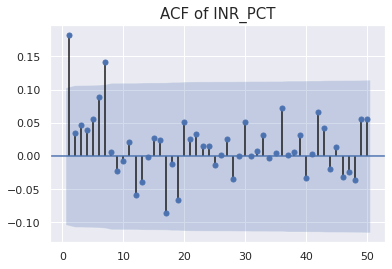

In [ ]:
sgt.plot_acf(mydatats.INR_pct, lags= 50, zero= False)
plt.title("ACF of INR_PCT", size = 15)
plt.show()

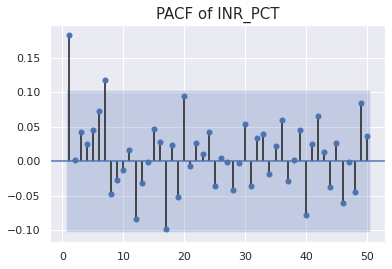

In [ ]:
sgt.plot_pacf(mydatats.INR_pct, lags= 50, zero= False)
plt.title("PACF of INR_PCT", size = 15)
plt.show()

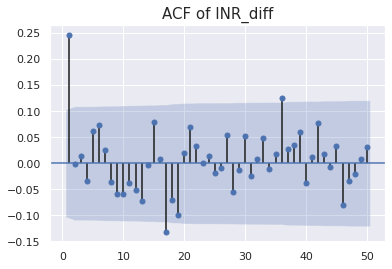

In [ ]:
sgt.plot_acf(mydatats.INR_diff, lags= 50, zero= False)
plt.title("ACF of INR_diff", size = 15)
plt.show()

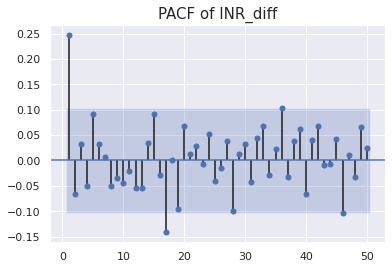

In [ ]:
sgt.plot_pacf(mydatats.INR_diff, lags= 50, zero= False)
plt.title("PACF of INR_diff", size = 15)
plt.show()

**Normalization and Z Score**

In [ ]:
base_value =mydatats.INR.iloc[0]
mydatats['INR_norm']= mydatats.INR.div(base_value).mul(100)
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff,INR_norm
DATE,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,0.3,100.000000
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,0.3,100.842697
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,0.4,101.966292
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,0.0,101.966292
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,0.2,102.528090


**Z Score of INR** : [((X-mean(x))/S.D(X)]

In [ ]:
mean_dev = mydatats.INR.sub(mydatats.INR.mean())
mydatats['Z_INR']= mean_dev.div(mydatats.INR.std())
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff,INR_norm,Z_INR
DATE,,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,0.3,100.000000,-2.171572
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,0.3,100.842697,-2.160860
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,0.4,101.966292,-2.146576
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,0.0,101.966292,-2.146576
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,0.2,102.528090,-2.139435


In [ ]:
sts.adfuller(mydatats.INR_norm)

(-1.1307118716098985,
 0.7026702993551432,
 1,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 2035.7422970937664)

In [ ]:
sts.adfuller(mydatats.Z_INR)

(-1.1307118716098998,
 0.7026702993551427,
 1,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 -950.0548470374181)

<function matplotlib.pyplot.tight_layout>

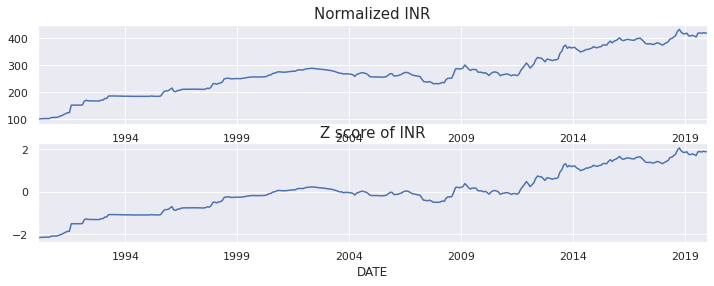

In [ ]:
plt.subplot(2, 1, 1)
mydatats.INR_norm.plot(figsize = (12,4))
plt.title("Normalized INR", size=15)

plt.subplot(2, 1, 2)
mydatats.Z_INR.plot(figsize = (12,4))
plt.title("Z score of INR", size=15)
plt.tight_layout

**Autoregressive and Moving Average method**

**AR**

Y = INR

(AR1) Yt = A + B1Yt-1 + Et

(AR2) Yt = A + B1Yt-1 + B2Yt-2 + Et

(ARp) Yt = A + B1Yt-1 + B2Yt-2 + ....+ BpYt-p + Et

MA(1) Yt = A + y1Et-1 + Et

MA(2) Yt = A + y1Et-1 +y2Et-2 + Et

(MAq) Yt = A + y1Et-1 + y2Et-2 + ....+ yqEt-q + Et

Yt = A + B1Yt-1 + Et

Yt-1 = A' + B2Yt-2 + Et-1

Yt = A + B1(A' + B2Yt-2 + Et-1) + Et

Yt = (A + A'B) + [B1B2Yt-2] + [B1(Et-1) + Et]

                   AR               MA    
ARMA(2,1): Yt = A + B1Yt-1 + B2Yt-2 + y1Et-1 + Et

 ARMA =  A + B1Yt-1 + B2Yt-2 + ....+ BpYt-p + y1Et-1 + y2Et-2 + ....+ yqEt-q + Et         

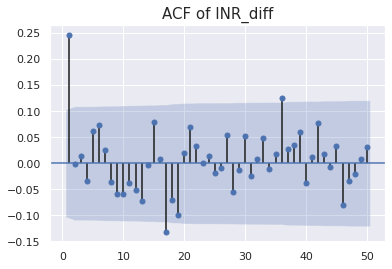

In [ ]:
sgt.plot_acf(mydatats.INR_diff, lags= 50, zero= False)
plt.title("ACF of INR_diff", size = 15)
plt.show()

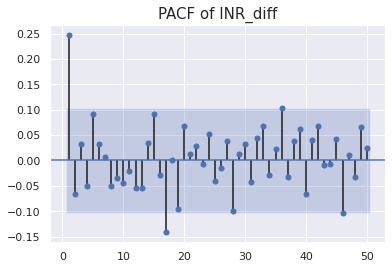

In [ ]:
sgt.plot_pacf(mydatats.INR_diff, lags= 50, zero= False)
plt.title("PACF of INR_diff", size = 15)
plt.show()

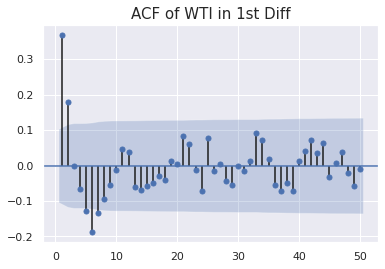

In [ ]:
sgt.plot_acf(mydatats.WTI.diff().dropna(), lags= 50, zero= False)
plt.title("ACF of WTI in 1st Diff", size = 15)
plt.show()

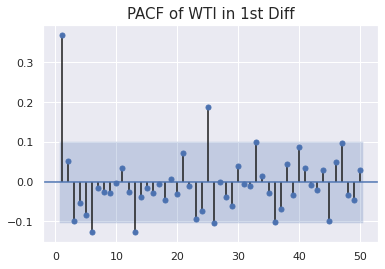

In [ ]:
sgt.plot_pacf(mydatats.WTI.diff().dropna(), lags= 50, zero= False)
plt.title("PACF of WTI in 1st Diff", size = 15)
plt.show()

**AR Model for INR**


In [ ]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [ ]:
ret_ar1 = ARMA(mydatats.INR_diff, order=(1,0))
result_ret_ar1 = ret_ar1.fit()
print(result_ret_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(1, 0)   Log Likelihood                -688.613
Method:                       css-mle   S.D. of innovations              1.639
Date:                Sat, 12 Sep 2020   AIC                           1383.226
Time:                        04:39:36   BIC                           1394.884
Sample:                    02-01-1990   HQIC                          1387.861
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3171      0.114      2.770      0.006       0.093       0.541
ar.L1.INR_diff     0.2462      0.051      4.828      0.000       0.146       0.346
                                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
ret_ar2 = ARMA(mydatats.INR_diff, order=(2,0))
result_ret_ar2 = ret_ar2.fit()
print(result_ret_ar2.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(2, 0)   Log Likelihood                -687.827
Method:                       css-mle   S.D. of innovations              1.635
Date:                Sat, 12 Sep 2020   AIC                           1383.653
Time:                        04:39:36   BIC                           1399.198
Sample:                    02-01-1990   HQIC                          1389.834
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3174      0.107      2.960      0.003       0.107       0.527
ar.L1.INR_diff     0.2625      0.053      4.998      0.000       0.160       0.365
ar.L2.INR_diff    -0.0659      0.052

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
ret_ar3 = ARMA(mydatats.INR_diff, order=(3,0))
result_ret_ar3 = ret_ar3.fit()
print(result_ret_ar3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(3, 0)   Log Likelihood                -687.633
Method:                       css-mle   S.D. of innovations              1.634
Date:                Sat, 12 Sep 2020   AIC                           1385.265
Time:                        04:39:36   BIC                           1404.696
Sample:                    02-01-1990   HQIC                          1392.991
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3174      0.111      2.866      0.004       0.100       0.534
ar.L1.INR_diff     0.2647      0.053      5.031      0.000       0.162       0.368
ar.L2.INR_diff    -0.0745      0.054

**Model Validation**

In [ ]:
print("AR(1,0): LL= ", round(result_ret_ar1.llf,3), "\t AIC = ", round(result_ret_ar1.aic,3))
print("AR(2,0): LL= ", round(result_ret_ar2.llf,3), "\t AIC = ", round(result_ret_ar2.aic,3))
print("AR(3,0): LL= ", round(result_ret_ar3.llf,3), "\t AIC = ", round(result_ret_ar3.aic,3))


AR(1,0): LL=  -688.613 	 AIC =  1383.226
AR(2,0): LL=  -687.827 	 AIC =  1383.653
AR(3,0): LL=  -687.633 	 AIC =  1385.265


MA Model

In [ ]:
ret_ma1 = ARMA(mydatats.INR_diff, order=(0,1))
result_ret_ma1 = ret_ma1.fit()
print(result_ret_ma1.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(0, 1)   Log Likelihood                -687.553
Method:                       css-mle   S.D. of innovations              1.634
Date:                Sat, 12 Sep 2020   AIC                           1381.107
Time:                        04:39:36   BIC                           1392.765
Sample:                    02-01-1990   HQIC                          1385.742
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3174      0.109      2.900      0.004       0.103       0.532
ma.L1.INR_diff     0.2720      0.053      5.160      0.000       0.169       0.375
                                    

In [ ]:
ret_ma2 = ARMA(mydatats.INR_diff, order=(0,2))
result_ret_ma2 = ret_ma2.fit()
print(result_ret_ma2.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(0, 2)   Log Likelihood                -687.462
Method:                       css-mle   S.D. of innovations              1.633
Date:                Sat, 12 Sep 2020   AIC                           1382.923
Time:                        04:39:36   BIC                           1398.468
Sample:                    02-01-1990   HQIC                          1389.104
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3175      0.107      2.965      0.003       0.108       0.527
ma.L1.INR_diff     0.2684      0.052      5.133      0.000       0.166       0.371
ma.L2.INR_diff    -0.0238      0.056

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
print("AR(1,0): LL= ", round(result_ret_ar1.llf,3), "\t AIC = ", round(result_ret_ar1.aic,3))
print("AR(2,0): LL= ", round(result_ret_ar2.llf,3), "\t AIC = ", round(result_ret_ar2.aic,3))
print("AR(3,0): LL= ", round(result_ret_ar3.llf,3), "\t AIC = ", round(result_ret_ar3.aic,3))

print("MA(0,1): LL= ", round(result_ret_ma1.llf,3), "\t AIC = ", round(result_ret_ma1.aic,3))
print("MA(0,2): LL= ", round(result_ret_ma2.llf,3), "\t AIC = ", round(result_ret_ma2.aic,3))

AR(1,0): LL=  -688.613 	 AIC =  1383.226
AR(2,0): LL=  -687.827 	 AIC =  1383.653
AR(3,0): LL=  -687.633 	 AIC =  1385.265
MA(0,1): LL=  -687.553 	 AIC =  1381.107
MA(0,2): LL=  -687.462 	 AIC =  1382.923


**ARMA**

In [ ]:
ret_ar1_ma1 = ARMA(mydatats.INR_diff, order=(1,1))
result_ret_ar1_ma1 = ret_ar1_ma1.fit()
print(result_ret_ar1_ma1.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(1, 1)   Log Likelihood                -687.398
Method:                       css-mle   S.D. of innovations              1.633
Date:                Sat, 12 Sep 2020   AIC                           1382.796
Time:                        04:39:36   BIC                           1398.340
Sample:                    02-01-1990   HQIC                          1388.977
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3175      0.106      2.999      0.003       0.110       0.525
ar.L1.INR_diff    -0.1480      0.261     -0.568      0.571      -0.659       0.363
ma.L1.INR_diff     0.4130      0.245

In [ ]:
ret_ar1_ma2 = ARMA(mydatats.INR_diff, order=(1,2))
result_ret_ar1_ma2 = ret_ar1_ma2.fit()
print(result_ret_ar1_ma2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(1, 2)   Log Likelihood                -686.888
Method:                       css-mle   S.D. of innovations              1.631
Date:                Sat, 12 Sep 2020   AIC                           1383.777
Time:                        04:39:37   BIC                           1403.207
Sample:                    02-01-1990   HQIC                          1391.503
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3173      0.107      2.967      0.003       0.108       0.527
ar.L1.INR_diff    -0.6809      0.263     -2.591      0.010      -1.196      -0.166
ma.L1.INR_diff     0.9469      0.269

In [ ]:
print("ARMA(1,1): LL= ", round(result_ret_ar1_ma1.llf,3), "\t AIC = ", round(result_ret_ar1_ma1.aic,3))
print("ARMA(1,2): LL= ", round(result_ret_ar1_ma2.llf,3), "\t AIC = ", round(result_ret_ar1_ma2.aic,3))

ARMA(1,1): LL=  -687.398 	 AIC =  1382.796
ARMA(1,2): LL=  -686.888 	 AIC =  1383.777


In [ ]:
ret_ar2_ma1 = ARMA(mydatats.INR_diff, order=(2,1))
result_ret_ar2_ma1 = ret_ar2_ma1.fit()
print(result_ret_ar2_ma1.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(2, 1)   Log Likelihood                -686.737
Method:                       css-mle   S.D. of innovations              1.630
Date:                Sat, 12 Sep 2020   AIC                           1383.474
Time:                        04:39:37   BIC                           1402.905
Sample:                    02-01-1990   HQIC                          1391.200
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3172      0.110      2.884      0.004       0.102       0.533
ar.L1.INR_diff    -0.4655      0.184     -2.527      0.012      -0.827      -0.104
ar.L2.INR_diff     0.1104      0.081

In [ ]:
print("ARMA(1,1): LL= ", round(result_ret_ar1_ma1.llf,3), "\t AIC = ", round(result_ret_ar1_ma1.aic,3))
print("ARMA(1,2): LL= ", round(result_ret_ar1_ma2.llf,3), "\t AIC = ", round(result_ret_ar1_ma2.aic,3))
print("ARMA(2,1): LL= ", round(result_ret_ar2_ma1.llf,3), "\t AIC = ", round(result_ret_ar2_ma1.aic,3))

ARMA(1,1): LL=  -687.398 	 AIC =  1382.796
ARMA(1,2): LL=  -686.888 	 AIC =  1383.777
ARMA(2,1): LL=  -686.737 	 AIC =  1383.474


**Evaluate Residuals**

In [ ]:
mydatats['resid_ar1']= result_ret_ar1.resid
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff,INR_norm,Z_INR,resid_ar1
DATE,,,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,0.3,100.000000,-2.171572,-0.017101
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,0.3,100.842697,-2.160860,-0.012890
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,0.4,101.966292,-2.146576,0.087110
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,0.0,101.966292,-2.146576,-0.337511
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,0.2,102.528090,-2.139435,-0.039029


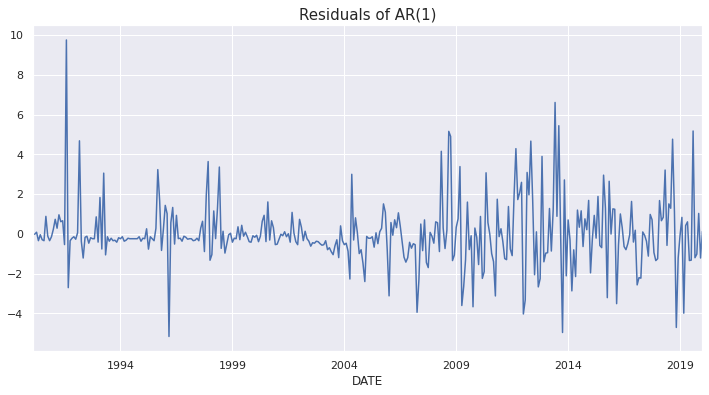

In [ ]:
mydatats.resid_ar1.plot(figsize =(12,6))
plt.title("Residuals of AR(1)", size = 15)
plt.show()

Estimates residual are assumed to be stationary, non auto correlated, normally distributed

In [ ]:
sts.adfuller(mydatats.resid_ar1)

(-18.57622261431398,
 2.0801323270208473e-30,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1328.346306794505)

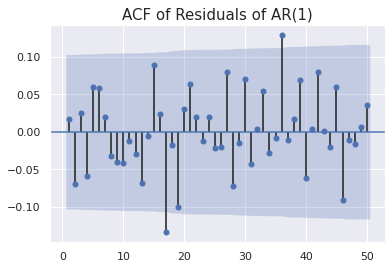

In [ ]:
sgt.plot_acf(mydatats.resid_ar1, lags= 50, zero= False)
plt.title("ACF of Residuals of AR(1)", size = 15)
plt.show()

**Histogram of Estimated residuals**

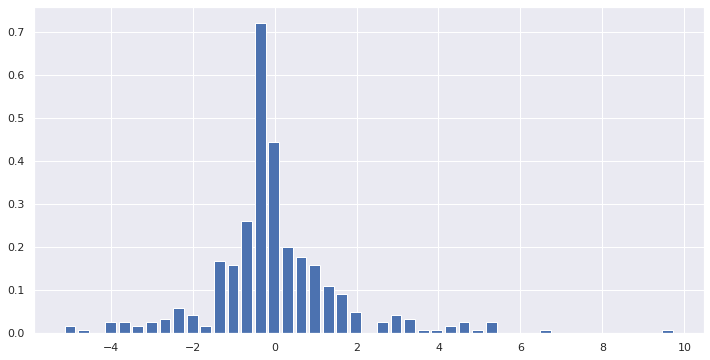

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(result_ret_ar1.resid, bins= "auto", density= True, rwidth= 0.8)
plt.show()

**Analyzing Oil Prices index using ARIMA**

We will cover two things
1. What is forecasting and choosing the best model?
2. Why forecasting is required?

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff,INR_norm,Z_INR,resid_ar1
DATE,,,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,0.3,100.000000,-2.171572,-0.017101
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,0.3,100.842697,-2.160860,-0.012890
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,0.4,101.966292,-2.146576,0.087110
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,0.0,101.966292,-2.146576,-0.337511
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,0.2,102.528090,-2.139435,-0.039029


In [ ]:
sts.adfuller(mydatats.WTI)

(-1.6748824610016455,
 0.444098027288102,
 6,
 353,
 {'1%': -3.4490114443793214,
  '10%': -2.5711506161673716,
  '5%': -2.8697627072503757},
 1962.2571226093576)

H0: WTI at level is non-stationary(It has unit root problem and the data are serially correlated)



H1:  WTI at level is stationary(It has no unit root problem and the data are not serially correlated)



Serially correlated big values in ACF 
One value large in PACF and rest of the values keep decreasing 

**ACF and PACF**

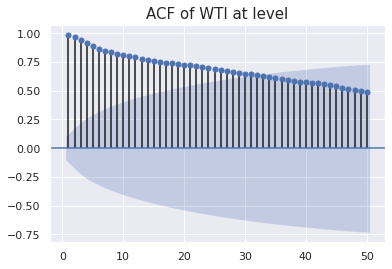

In [ ]:
sgt.plot_acf(mydatats.WTI, lags = 50, zero = False)
plt.title("ACF of WTI at level", size = 15)
plt.show()

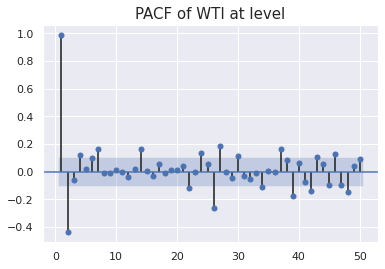

In [ ]:
sgt.plot_pacf(mydatats.WTI, lags = 50, zero = False)
plt.title("PACF of WTI at level", size = 15)
plt.show()

Since WTI at level is not stationary, we have to take necessary steps to make it **mean reverting** 

WTI_pct = ((WTIt - WTI(t-1))/ WTI(t-1)) * 100

In [ ]:
mydatats["WTI_return"] = mydatats.WTI.pct_change(1).mul(100)
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff,INR_norm,Z_INR,resid_ar1,WTI_return
DATE,,,,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,0.3,100.000000,-2.171572,-0.017101,NaN
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,0.3,100.842697,-2.160860,-0.012890,0.000000
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,0.4,101.966292,-2.146576,0.087110,-16.644052
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,0.0,101.966292,-2.146576,-0.337511,-1.247965
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,0.2,102.528090,-2.139435,-0.039029,-8.241758


In [ ]:
del mydatats["resid_ar1"], mydatats["INR_norm"], mydatats["INR_diff"]

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,Z_INR,WTI_return
DATE,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,-2.171572,NaN
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,-2.160860,0.000000
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,-2.146576,-16.644052
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,-2.146576,-1.247965
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,-2.139435,-8.241758


ACF AND PACF of WTI Return 

In [ ]:
sts.adfuller(mydatats.WTI_return[1:])

(-14.239986767278156,
 1.5436122793025274e-26,
 0,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 2366.00555570038)

In [ ]:
def stationarity_test(mydata):
  print("Result of ADF Test")
  adf_test = sts.adfuller(mydata, autolag = "AIC")
  adf_output = pd.Series(adf_test[0:4],index=["Test Stat:", "P-Value"\
                                              , "Maximum Lag Used:"\
                                              ,"df:"])
  
  print(adf_output)


In [ ]:
stationarity_test(mydatats.WTI_return[1:])

Result of ADF Test
Test Stat:          -1.423999e+01
P-Value              1.543612e-26
Maximum Lag Used:    0.000000e+00
df:                  3.580000e+02
dtype: float64


In [ ]:
def stationarity_test(mydata):
  print("Result of ADF Test")
  adf_test = sts.adfuller(mydata.diff().dropna(), autolag = "AIC")
  adf_output = pd.Series(adf_test[0:4],index=["Test Stat:", "P-Value"\
                                              , "Maximum Lag Used:"\
                                              ,"df:"])
  
  print(adf_output)


In [ ]:
stationarity_test(mydatats.WTI)

Result of ADF Test
Test Stat:          -9.068526e+00
P-Value              4.365705e-15
Maximum Lag Used:    5.000000e+00
df:                  3.530000e+02
dtype: float64


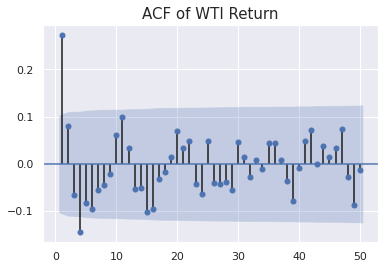

In [ ]:
sgt.plot_acf(mydatats.WTI_return[1:], lags=50, zero=False)
plt.title("ACF of WTI Return", size=15)
plt.show()

MA(1) to MA(4)
Fit a MA Model for WTI Model 

In [ ]:
wti_ma1 = ARMA(mydatats.WTI_return[1:], order = [0,1])
result_wti_ma1 = wti_ma1.fit()
print(result_wti_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(0, 1)   Log Likelihood               -1263.338
Method:                       css-mle   S.D. of innovations              8.166
Date:                Sat, 12 Sep 2020   AIC                           2532.677
Time:                        04:39:40   BIC                           2544.327
Sample:                    03-01-1990   HQIC                          2537.309
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6236      0.537      1.162      0.246      -0.428       1.675
ma.L1.WTI_return     0.2459      0.047      5.221      0.000       0.154       0.338
                            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Z should be seen  in absolute 
unit root variables should be seen in absolute 
likelihood ratio should be seen as it is 

In [ ]:
wti_ma4 = ARMA(mydatats.WTI_return[1:], order = [0,4])
result_wti_ma4 = wti_ma4.fit()
print(result_wti_ma4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(0, 4)   Log Likelihood               -1258.774
Method:                       css-mle   S.D. of innovations              8.062
Date:                Sat, 12 Sep 2020   AIC                           2529.548
Time:                        04:39:40   BIC                           2552.848
Sample:                    03-01-1990   HQIC                          2538.814
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6248      0.505      1.238      0.216      -0.364       1.614
ma.L1.WTI_return     0.2577      0.053      4.831      0.000       0.153       0.362
ma.L2.WTI_return     0.0860 

In [ ]:
print("MA(0,1): LL= ", round(result_wti_ma1.llf,3), "\t AIC = ", round(result_wti_ma1.aic,3))
print("MA(0,4): LL= ", round(result_wti_ma4.llf,3), "\t AIC = ", round(result_wti_ma4.aic,3))


MA(0,1): LL=  -1263.338 	 AIC =  2532.677
MA(0,4): LL=  -1258.774 	 AIC =  2529.548


Resting of Residuals 

In [ ]:
mydatats['resid_wti_ma1'] = result_wti_ma1.resid
mydatats['resid_wti_ma4'] = result_wti_ma4.resid

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,Z_INR,WTI_return,resid_wti_ma1,resid_wti_ma4
DATE,,,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,49.406270,0.000000,-2.171572,NaN,NaN,NaN
1990-03-01,22.11,18.39,35.9,-0.28,142.211481,0.842697,-2.160860,0.000000,-0.623577,-0.624849
1990-04-01,18.43,16.61,36.3,-6.18,58.524521,1.114206,-2.146576,-16.644052,-17.123045,-17.107639
1990-05-01,18.20,16.35,36.3,-1.62,106.164035,0.000000,-2.146576,-1.247965,2.324233,2.610004
1990-06-01,16.70,15.10,36.5,-3.48,139.356883,0.550964,-2.139435,-8.241758,-9.436702,-8.174775


Residuals are assumed to be zero mean, constant variance and follow a normal distribution

In [ ]:
print(f"Mean of MA1:{mydatats.resid_wti_ma1.mean()}")
print(f"SD of MA1:{mydatats.resid_wti_ma1.std()}")
print(f"Variance of MA1:{mydatats.resid_wti_ma1.var()}")

Mean of MA1:-0.0020500434462571173
SD of MA1:8.177930318898547
Variance of MA1:66.8785443007601


In [ ]:
print(f"Mean of MA4:{mydatats.resid_wti_ma4.mean()}")
print(f"Variance of MA4:{mydatats.resid_wti_ma4.var()}")
print(f"SD of MA4:{mydatats.resid_wti_ma4.std()}")

Mean of MA4:-0.003943505749583132
Variance of MA4:65.20321779677488
SD of MA4:8.074850945793047


**Residuals should be non-auto correlated**


if error terms have 8-9 autocorrelations, then model has scope of improvement 

if it is just 1 or 2 it is manageable 

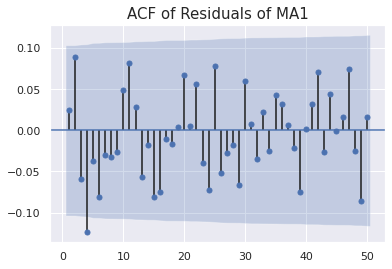

In [ ]:
sgt.plot_acf(mydatats.resid_wti_ma1[1:], lags=50, zero=False)
plt.title("ACF of Residuals of MA1", size=15)
plt.show()

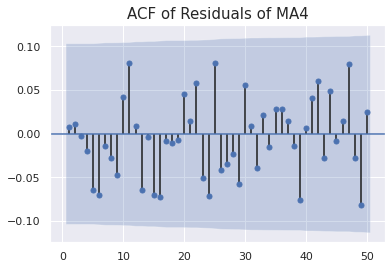

In [ ]:
sgt.plot_acf(mydatats.resid_wti_ma4[1:], lags=50, zero=False)
plt.title("ACF of Residuals of MA4", size=15)
plt.show()

In [ ]:
from scipy.stats import norm

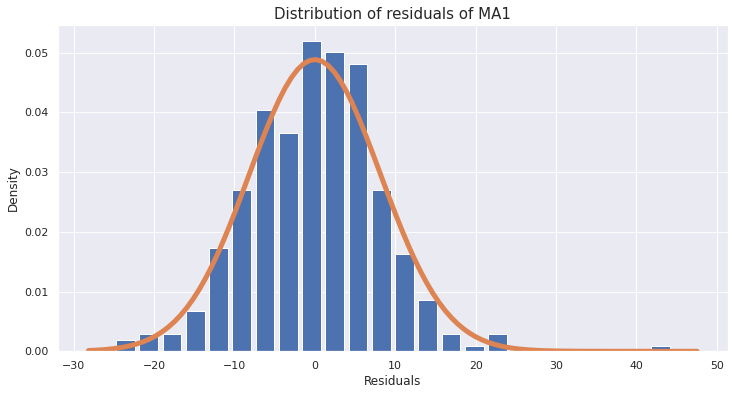

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.hist(mydatats.resid_wti_ma1[1:], bins="auto"\
         , density=True, rwidth=0.8\
         , label="Residual Plot")

mu, std = norm.fit(mydatats.resid_wti_ma1[1:])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num=100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,  linewidth=5)
plt.grid(axis="y", alpha = 0.9)
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.title("Distribution of residuals of MA1", size=15)
plt.show()

the outlier in the above residual plot indicates that there was an outlier in the data which was not captured by the model

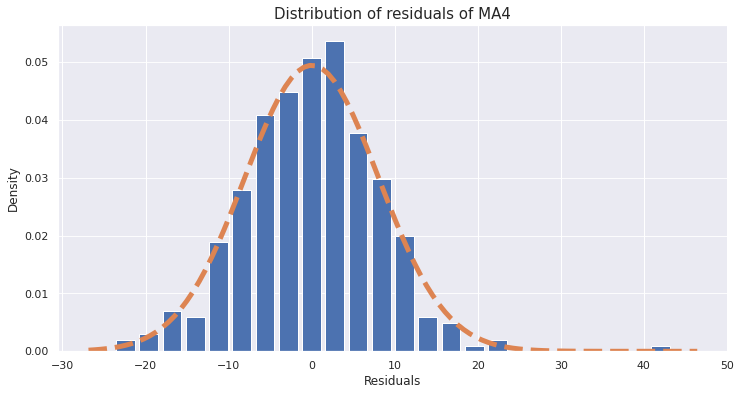

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(mydatats.resid_wti_ma4[1:], bins="auto"\
         , density=True, rwidth=0.8\
         , label="Residual Plot")

mu, std = norm.fit(mydatats.resid_wti_ma4[1:])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num=100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,"--",  linewidth=5)
plt.grid(axis="y", alpha = 0.9)
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.title("Distribution of residuals of MA4", size=15)
plt.show()

**Forecating WTI index using MA models**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


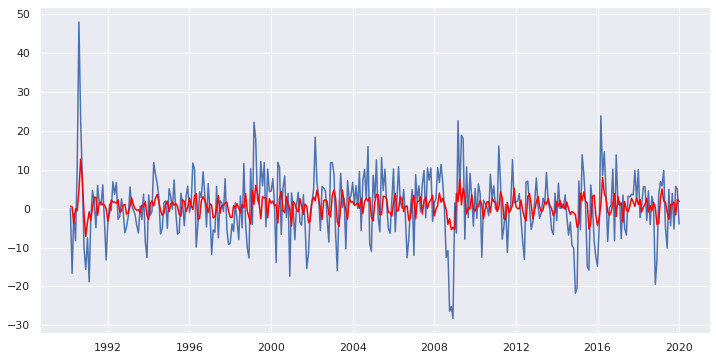

In [ ]:
wti_ma4  = ARMA(mydatats.WTI_return[1:], order=(0,4))
result_wti_ma4 = wti_ma4.fit()

plt.figure(figsize=(12,6))
plt.plot(mydatats.WTI_return[1:])
plt.plot(result_wti_ma4.fittedvalues, color="red")
plt.show()

Positive outliers gives postive tail, 
negative outliers gives negative tail 

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(mydatats.WTI_return[1:], result_wti_ma4.fittedvalues )

65.02160878590452

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


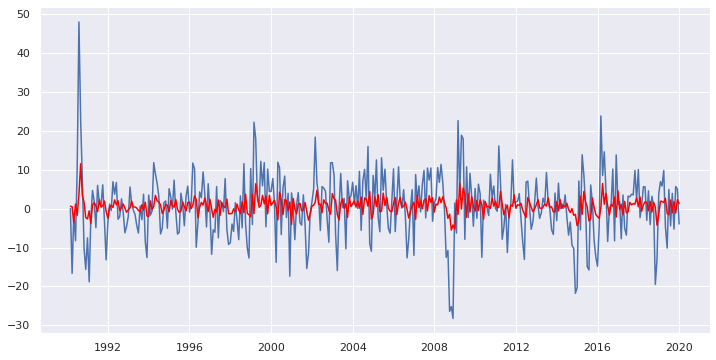

In [ ]:
wti_ma1  = ARMA(mydatats.WTI_return[1:], order=(0,1))
result_wti_ma1 = wti_ma1.fit()

plt.figure(figsize=(12,6))
plt.plot(mydatats.WTI_return[1:])
plt.plot(result_wti_ma1.fittedvalues, color="red")
plt.show()

In [ ]:
metrics.mean_squared_error(mydatats.WTI_return[1:], result_wti_ma1.fittedvalues )

66.69225729368685

1/4 of the data can be predicted using forecasting 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


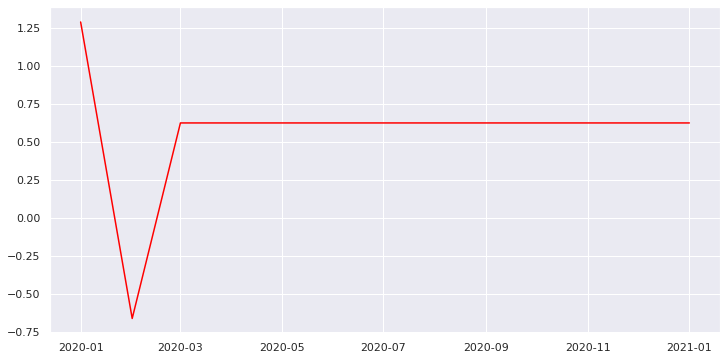

In [ ]:
wti_ma1  = ARMA(mydatats.WTI_return[1:], order=(0,1))
result_wti_ma1 = wti_ma1.fit()


forecast_m1 = result_wti_ma1.predict(start='01/01/2020', end='01/01/2021')
plt.figure(figsize=(12,6))

plt.plot(forecast_m1, color="red")
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


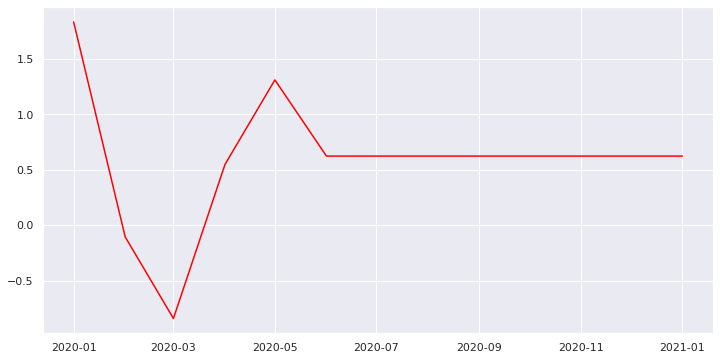

In [ ]:
wti_ma4  = ARMA(mydatats.WTI_return[1:], order=(0,4))
result_wti_ma4 = wti_ma4.fit()


forecast_m4 = result_wti_ma4.predict(start='01/01/2020', end='01/01/2021')
plt.figure(figsize=(12,6))

plt.plot(forecast_m4, color="red")
plt.show()

We see that the MA(0,4) model gives a little more predective power than MA(0,1) 
it becomes constant faster than this 

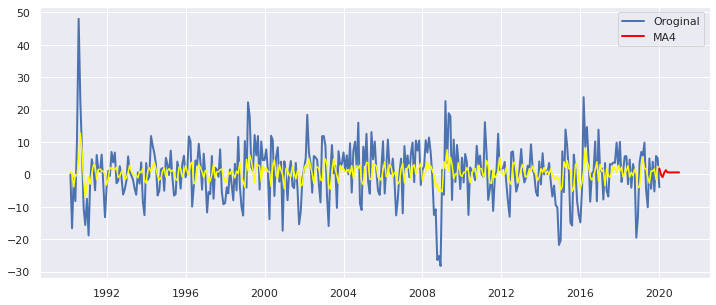

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(mydatats.WTI_return[1:], linewidth = 2, label = "Oroginal")
plt.plot(result_wti_ma4.fittedvalues, color='yellow')
plt.plot(forecast_m4, linewidth = 2, color = "red", label = "MA4")
plt.legend()
plt.show()

#**AR Model**

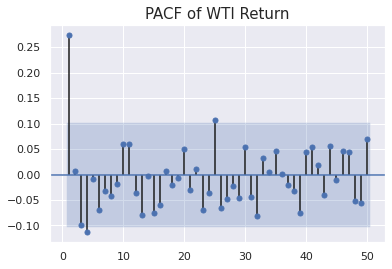

In [ ]:
sgt.plot_pacf(mydatats.WTI_return[1:], lags=50, zero=False)
plt.title("PACF of WTI Return", size=15)
plt.show()

In [ ]:
wti_ar1 = ARMA(mydatats.WTI_return[1:], order = [1,0])
result_wti_ar1 = wti_ar1.fit()
print(result_wti_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(1, 0)   Log Likelihood               -1261.908
Method:                       css-mle   S.D. of innovations              8.134
Date:                Sat, 12 Sep 2020   AIC                           2529.816
Time:                        04:39:44   BIC                           2541.465
Sample:                    03-01-1990   HQIC                          2534.448
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6193      0.590      1.050      0.295      -0.537       1.775
ar.L1.WTI_return     0.2731      0.051      5.386      0.000       0.174       0.372
                            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
wti_ar2 = ARMA(mydatats.WTI_return[1:], order = [2,0])
result_wti_ar2 = wti_ar2.fit()
print(result_wti_ar2.summary())

                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(2, 0)   Log Likelihood               -1261.901
Method:                       css-mle   S.D. of innovations              8.134
Date:                Sat, 12 Sep 2020   AIC                           2531.802
Time:                        04:39:44   BIC                           2547.335
Sample:                    03-01-1990   HQIC                          2537.979
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6188      0.594      1.043      0.298      -0.544       1.782
ar.L1.WTI_return     0.2714      0.053      5.144      0.000       0.168       0.375
ar.L2.WTI_return     0.0062 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
wti_ar4 = ARMA(mydatats.WTI_return[1:], order = [4,0])
result_wti_ar4 = wti_ar4.fit()
print(result_wti_ar4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(4, 0)   Log Likelihood               -1257.896
Method:                       css-mle   S.D. of innovations              8.042
Date:                Sat, 12 Sep 2020   AIC                           2527.792
Time:                        04:39:44   BIC                           2551.092
Sample:                    03-01-1990   HQIC                          2537.058
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6320      0.481      1.313      0.190      -0.312       1.576
ar.L1.WTI_return     0.2608      0.052      4.977      0.000       0.158       0.364
ar.L2.WTI_return     0.0365 

In [ ]:
print("AR(1,0): LL= ", round(result_wti_ar1.llf,3), "\t AIC = ", round(result_wti_ar1.aic,3))
print("AR(4,0): LL= ", round(result_wti_ar4.llf,3), "\t AIC = ", round(result_wti_ar4.aic,3))

AR(1,0): LL=  -1261.908 	 AIC =  2529.816
AR(4,0): LL=  -1257.896 	 AIC =  2527.792


In [ ]:
mydatats['resid_wti_ar1'] = result_wti_ar1.resid
mydatats['resid_wti_ar4'] = result_wti_ar4.resid

In [ ]:
print(f"Mean of AR1:{mydatats.resid_wti_ar1.mean()}")
print(f"SD of AR1:{mydatats.resid_wti_ar1.std()}")
print(f"Variance of AR1:{mydatats.resid_wti_ar1.var()}")

Mean of AR1:0.000469074860473914
SD of AR1:8.145065266563677
Variance of AR1:66.34208819658201


In [ ]:
print(f"Mean of AR4:{mydatats.resid_wti_ar4.mean()}")
print(f"SD of AR4:{mydatats.resid_wti_ar4.std()}")
print(f"Variance of AR4:{mydatats.resid_wti_ar4.var()}")

Mean of AR4:-0.010125144031125922
SD of AR4:8.054947215261361
Variance of AR4:64.88217464064675


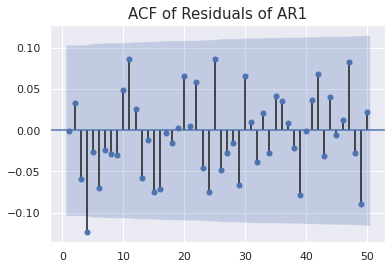

In [ ]:
sgt.plot_acf(mydatats.resid_wti_ar1[1:], lags=50, zero=False)
plt.title("ACF of Residuals of AR1", size=15)
plt.show()

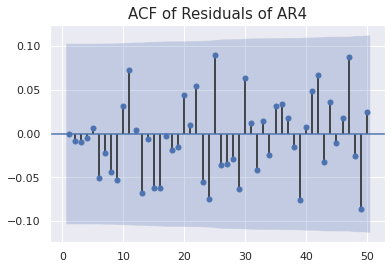

In [ ]:
sgt.plot_acf(mydatats.resid_wti_ar4[1:], lags=50, zero=False)
plt.title("ACF of Residuals of AR4", size=15)
plt.show()

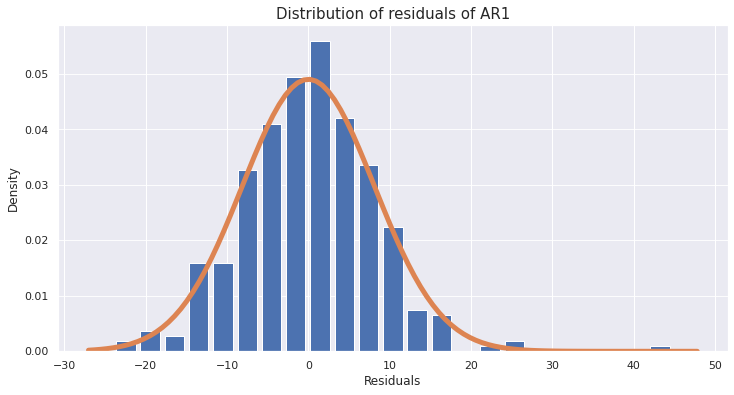

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.hist(mydatats.resid_wti_ar1[1:], bins="auto"\
         , density=True, rwidth=0.8\
         , label="Residual Plot")

mu, std = norm.fit(mydatats.resid_wti_ar1[1:])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num=100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,  linewidth=5)
plt.grid(axis="y", alpha = 0.9)
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.title("Distribution of residuals of AR1", size=15)
plt.show()

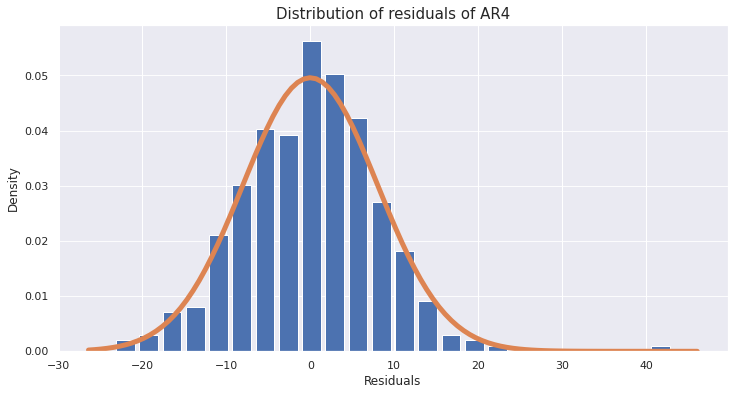

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.hist(mydatats.resid_wti_ar4[1:], bins="auto"\
         , density=True, rwidth=0.8\
         , label="Residual Plot")

mu, std = norm.fit(mydatats.resid_wti_ar4[1:])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num=100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,  linewidth=5)
plt.grid(axis="y", alpha = 0.9)
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.title("Distribution of residuals of AR4", size=15)
plt.show()

In [ ]:
metrics.mean_squared_error(mydatats.WTI_return[1:], result_wti_ar1.fittedvalues )

66.15729151355872

In [ ]:
metrics.mean_squared_error(mydatats.WTI_return[1:], result_wti_ar4.fittedvalues )

64.70154686771029

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


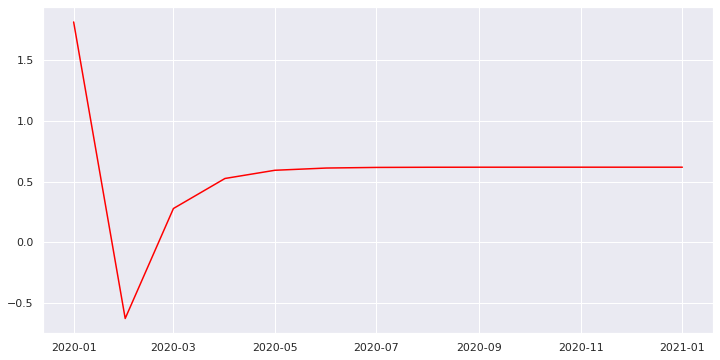

In [ ]:
wti_ar1  = ARMA(mydatats.WTI_return[1:], order=(1,0))
result_wti_ar1 = wti_ar1.fit()


forecast_ar1 = result_wti_ar1.predict(start='01/01/2020', end='01/01/2021')
plt.figure(figsize=(12,6))

plt.plot(forecast_ar1, color="red")
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


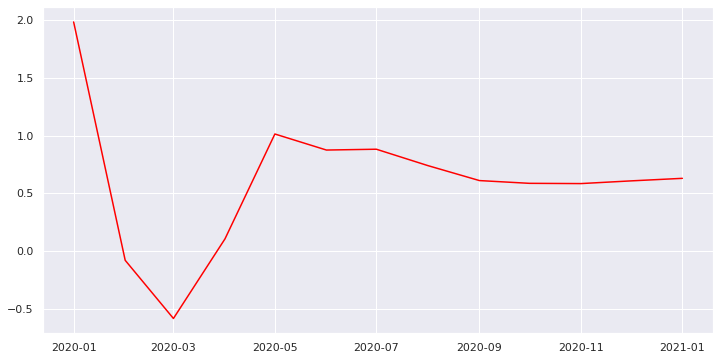

In [ ]:
wti_ar4  = ARMA(mydatats.WTI_return[1:], order=(4,0))
result_wti_ar4 = wti_ar4.fit()


forecast_ar4 = result_wti_ar4.predict(start='01/01/2020', end='01/01/2021')
plt.figure(figsize=(12,6))

plt.plot(forecast_ar4, color="red")
plt.show()

As per above diagrams we can see that the AR4 reaches mean value a little later than AR1. Hence AR4 is able to capture the trends a little better than AR1, hence we can say that AR4 is performing better.

#**ARIMA**


In [ ]:
wti_ar1_ma1 = ARMA(mydatats.WTI_return[1:], order = [1,1])
result_wti_ar1_ma1 = wti_ar1_ma1.fit()
print(result_wti_ar1_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(1, 1)   Log Likelihood               -1261.904
Method:                       css-mle   S.D. of innovations              8.134
Date:                Sat, 12 Sep 2020   AIC                           2531.808
Time:                        04:39:47   BIC                           2547.341
Sample:                    03-01-1990   HQIC                          2537.985
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6190      0.592      1.046      0.296      -0.541       1.779
ar.L1.WTI_return     0.2851      0.144      1.977      0.049       0.003       0.568
ma.L1.WTI_return    -0.0130 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
wti_ar1_ma2 = ARMA(mydatats.WTI_return[1:], order = [1,2])
result_wti_ar1_ma2 = wti_ar1_ma2.fit()
print(result_wti_ar1_ma2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(1, 2)   Log Likelihood               -1261.146
Method:                       css-mle   S.D. of innovations              8.116
Date:                Sat, 12 Sep 2020   AIC                           2532.291
Time:                        04:39:47   BIC                           2551.708
Sample:                    03-01-1990   HQIC                          2540.013
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6172      0.598      1.033      0.302      -0.554       1.788
ar.L1.WTI_return     0.0118      0.265      0.045      0.965      -0.507       0.531
ma.L1.WTI_return     0.2581 

In [ ]:
# this will give error
wti_ar1_ma3 = ARMA(mydatats.WTI_return[1:], order = [1,3])
try:
  result_wti_ar1_ma3 = wti_ar1_ma3.fit()
except:
  print("Raises value error The computed initial AR coefficients are not stationary\
You should induce stationarity, choose a different model order, or you can\
pass your own start_params")
print(result_wti_ar1_ma2.summary())

Raises value error The computed initial AR coefficients are not stationaryYou should induce stationarity, choose a different model order, or you canpass your own start_params
                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(1, 2)   Log Likelihood               -1261.146
Method:                       css-mle   S.D. of innovations              8.116
Date:                Sat, 12 Sep 2020   AIC                           2532.291
Time:                        04:39:47   BIC                           2551.708
Sample:                    03-01-1990   HQIC                          2540.013
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1,3)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.



Changing the difference

In [ ]:
wti_ar3_ma2 = ARMA(mydatats.WTI_return[1:], order = [3,2])
result_wti_ar3_ma2 = wti_ar3_ma2.fit()
print(result_wti_ar3_ma2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(3, 2)   Log Likelihood               -1257.004
Method:                       css-mle   S.D. of innovations              8.021
Date:                Sat, 12 Sep 2020   AIC                           2528.009
Time:                        04:39:48   BIC                           2555.192
Sample:                    03-01-1990   HQIC                          2538.819
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6363      0.494      1.288      0.199      -0.332       1.605
ar.L1.WTI_return     1.7831      0.141     12.668      0.000       1.507       2.059
ar.L2.WTI_return    -1.2211 

In [ ]:
wti_ar4_ma4 = ARMA(mydatats.WTI_return[1:], order = [4,4])
result_wti_ar4_ma4 = wti_ar4_ma4.fit()
print(result_wti_ar4_ma4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(4, 4)   Log Likelihood               -1253.382
Method:                       css-mle   S.D. of innovations              7.896
Date:                Sat, 12 Sep 2020   AIC                           2526.764
Time:                        04:39:51   BIC                           2565.598
Sample:                    03-01-1990   HQIC                          2542.207
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6225      0.403      1.546      0.123      -0.167       1.412
ar.L1.WTI_return     0.0722      0.152      0.475      0.635      -0.226       0.370
ar.L2.WTI_return     0.0754 

In [ ]:
wti_ar5_ma3 = ARMA(mydatats.WTI_return[1:], order = [5,3])
result_wti_ar5_ma3 = wti_ar5_ma3.fit()
print(result_wti_ar5_ma3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(5, 3)   Log Likelihood               -1254.558
Method:                       css-mle   S.D. of innovations              7.962
Date:                Sat, 12 Sep 2020   AIC                           2529.115
Time:                        04:39:53   BIC                           2567.949
Sample:                    03-01-1990   HQIC                          2544.558
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6155      0.427      1.441      0.151      -0.222       1.453
ar.L1.WTI_return     2.1213      0.222      9.550      0.000       1.686       2.557
ar.L2.WTI_return    -2.0667 

In [ ]:
#wherever there is a problem in the model because of the 1, the model changes that parti
#value to lag 4
wti_ar1_ma3 = ARMA(mydatats.WTI_return[1:], order = [1,3])
result_wti_ar1_ma3 = wti_ar1_ma3.fit(start_ar_lags=4)
print(result_wti_ar1_ma3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(1, 3)   Log Likelihood               -1258.056
Method:                       css-mle   S.D. of innovations              8.045
Date:                Sat, 12 Sep 2020   AIC                           2528.111
Time:                        04:39:53   BIC                           2551.411
Sample:                    03-01-1990   HQIC                          2537.376
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6227      0.317      1.966      0.050       0.002       1.243
ar.L1.WTI_return     0.8496      0.081     10.549      0.000       0.692       1.008
ma.L1.WTI_return    -0.6093 

In [ ]:
wti_ar3_ma2 = ARMA(mydatats.WTI_return[1:], order = [3,2])
result_wti_ar3_ma2 = wti_ar3_ma2.fit()
print(result_wti_ar3_ma2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(3, 2)   Log Likelihood               -1257.004
Method:                       css-mle   S.D. of innovations              8.021
Date:                Sat, 12 Sep 2020   AIC                           2528.009
Time:                        04:39:54   BIC                           2555.192
Sample:                    03-01-1990   HQIC                          2538.819
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6363      0.494      1.288      0.199      -0.332       1.605
ar.L1.WTI_return     1.7831      0.141     12.668      0.000       1.507       2.059
ar.L2.WTI_return    -1.2211 

In [ ]:
wti_ar3_ma3 = ARMA(mydatats.WTI_return[1:], order = [3,3])
result_wti_ar3_ma3 = wti_ar3_ma3.fit()
print(result_wti_ar3_ma3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(3, 3)   Log Likelihood               -1256.965
Method:                       css-mle   S.D. of innovations              8.020
Date:                Sat, 12 Sep 2020   AIC                           2529.930
Time:                        04:39:54   BIC                           2560.996
Sample:                    03-01-1990   HQIC                          2542.284
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6369      0.500      1.274      0.204      -0.343       1.617
ar.L1.WTI_return     1.8639      0.299      6.237      0.000       1.278       2.450
ar.L2.WTI_return    -1.3468 

Comparing all the models 

In [ ]:
print("ARMA(1,1): LL= ", round(result_wti_ar1_ma1.llf,3), "\t AIC = ", round(result_wti_ar1_ma1.aic,3))
print("ARMA(1,3): LL= ", round(result_wti_ar1_ma3.llf,3), "\t AIC = ", round(result_wti_ar1_ma3.aic,3))
print("ARMA(3,2): LL= ", round(result_wti_ar3_ma2.llf,3), "\t AIC = ", round(result_wti_ar3_ma2.aic,3))
print("ARMA(3,3): LL= ", round(result_wti_ar3_ma3.llf,3), "\t AIC = ", round(result_wti_ar3_ma3.aic,3))
print("ARMA(5,3): LL= ", round(result_wti_ar5_ma3.llf,3), "\t AIC = ", round(result_wti_ar5_ma3.aic,3))

ARMA(1,1): LL=  -1261.904 	 AIC =  2531.808
ARMA(1,3): LL=  -1258.056 	 AIC =  2528.111
ARMA(3,2): LL=  -1257.004 	 AIC =  2528.009
ARMA(3,3): LL=  -1256.965 	 AIC =  2529.93
ARMA(5,3): LL=  -1254.558 	 AIC =  2529.115


In [ ]:
mydatats['resid_wti_ar3_ma2'] = result_wti_ar3_ma2.resid
mydatats['resid_wti_ar5_ma3'] = result_wti_ar5_ma3.resid

In [ ]:
print(f"Mean of AR3MA2:{mydatats.resid_wti_ar3_ma2.mean()}")
print(f"SD of AR3MA2:{mydatats.resid_wti_ar3_ma2.std()}")
print(f"Variance of AR3MA2:{mydatats.resid_wti_ar3_ma2.var()}")

Mean of AR3MA2:-0.013005510875740277
SD of AR3MA2:8.040104233697035
Variance of AR3MA2:64.64327608871298


In [ ]:
print(f"Mean of AR3MA2:{mydatats.resid_wti_ar5_ma3.mean()}")
print(f"SD of AR3MA2:{mydatats.resid_wti_ar5_ma3.std()}")
print(f"Variance of AR3MA2:{mydatats.resid_wti_ar5_ma3.var()}")

Mean of AR3MA2:0.007419744750434133
SD of AR3MA2:7.988788812600134
Variance of AR3MA2:63.820746692325066


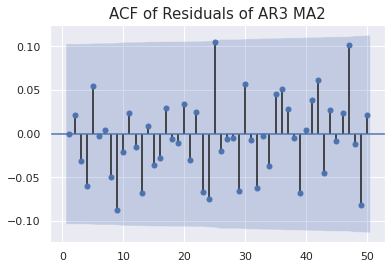

In [ ]:
sgt.plot_acf(mydatats.resid_wti_ar3_ma2[1:], lags=50, zero=False)
plt.title("ACF of Residuals of AR3 MA2", size=15)
plt.show()

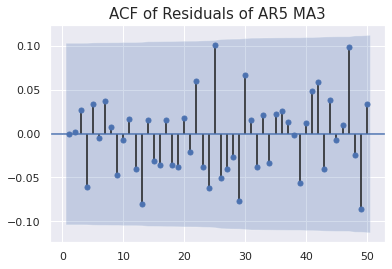

In [ ]:
sgt.plot_acf(mydatats.resid_wti_ar5_ma3[1:], lags=50, zero=False)
plt.title("ACF of Residuals of AR5 MA3", size=15)
plt.show()

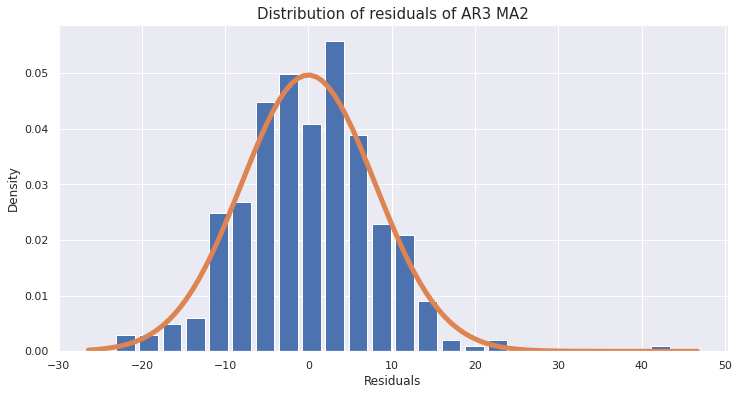

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.hist(mydatats.resid_wti_ar3_ma2[1:], bins="auto"\
         , density=True, rwidth=0.8\
         , label="Residual Plot")

mu, std = norm.fit(mydatats.resid_wti_ar3_ma2[1:])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num=100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,  linewidth=5)
plt.grid(axis="y", alpha = 0.9)
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.title("Distribution of residuals of AR3 MA2", size=15)
plt.show()

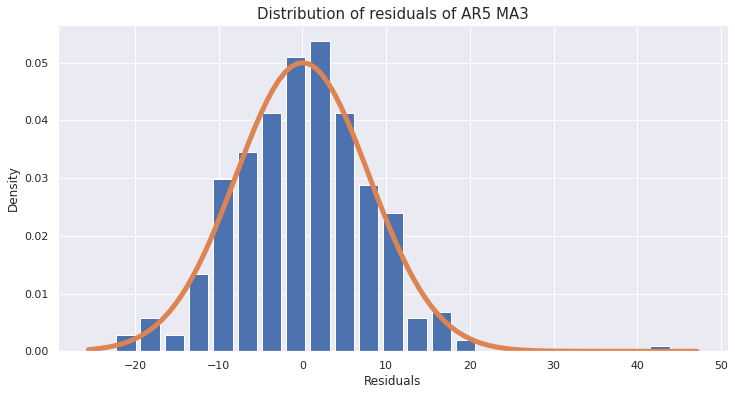

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.hist(mydatats.resid_wti_ar5_ma3[1:], bins="auto"\
         , density=True, rwidth=0.8\
         , label="Residual Plot")

mu, std = norm.fit(mydatats.resid_wti_ar5_ma3[1:])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num=100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,  linewidth=5)
plt.grid(axis="y", alpha = 0.9)
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.title("Distribution of residuals of AR5 MA3", size=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


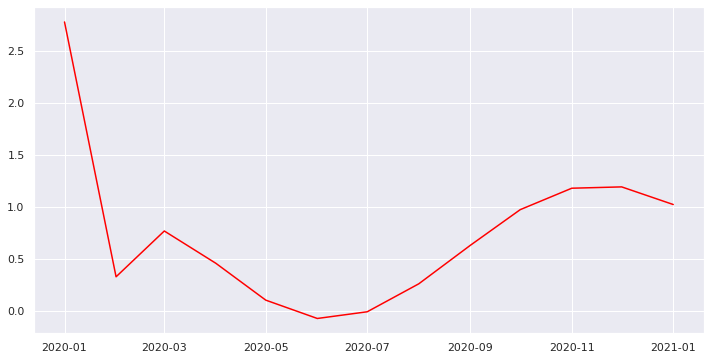

In [ ]:
wti_ar3_ma2  = ARMA(mydatats.WTI_return[1:], order=(3,2))
result_wti_ar3_ma2 = wti_ar3_ma2.fit()


forecast_ar3_ma2 = result_wti_ar3_ma2.predict(start='01/01/2020', end='01/01/2021')
plt.figure(figsize=(12,6))

plt.plot(forecast_ar3_ma2, color="red")
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


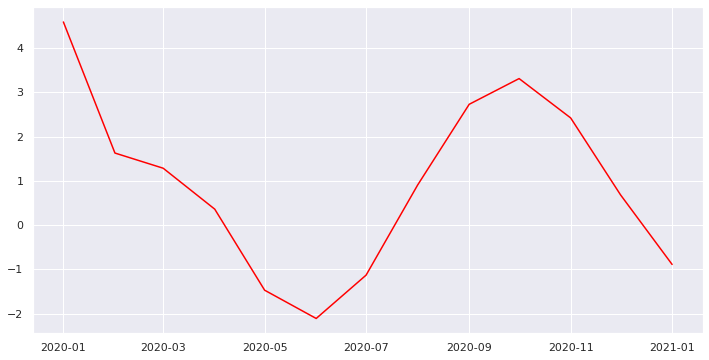

In [ ]:
wti_ar5_ma3  = ARMA(mydatats.WTI_return[1:], order=(5,3))
result_wti_ar5_ma3 = wti_ar5_ma3.fit()


forecast_ar5_ma3 = result_wti_ar5_ma3.predict(start='01/01/2020', end='01/01/2021')
plt.figure(figsize=(12,6))

plt.plot(forecast_ar5_ma3, color="red")
plt.show()

In [ ]:
metrics.mean_squared_error(mydatats.WTI_return[1:], result_wti_ar3_ma2.fittedvalues )

64.46338039612444

In [ ]:
metrics.mean_squared_error(mydatats.WTI_return[1:], result_wti_ar5_ma3.fittedvalues )

63.6430280772706

We compare the charts for ARMA(3,2) and ARMA(5,3) and we find that ARMA(5,3) model can does not reach mean too fast. Also the mse for ARMA(5,3) is the lowest compared to all the models that we have created


# **ARIMA with exogenous variable/s**


endogenous variable -> within the system
exogenous var -> super imposed variable

endogenous variable(normally the dependent var)
exogenous( out of the model , independent variable)

eg oil price with some other index,
policy variables, tax variables

if tax is good, market positive 
tax is bad, market is negative

inflation -> higher interest rate -> depreciate the currency -> import cost increases -> oil prices will increase



for monetary polices we find the correlated vars and remove the collinearity 



In [ ]:
wti_ar5_ma3 = ARMA(mydatats.WTI_return[1:], order = [5,3])
result_wti_ar5_ma3 = wti_ar5_ma3.fit()
print(result_wti_ar5_ma3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(5, 3)   Log Likelihood               -1254.558
Method:                       css-mle   S.D. of innovations              7.962
Date:                Sat, 12 Sep 2020   AIC                           2529.115
Time:                        04:40:00   BIC                           2567.949
Sample:                    03-01-1990   HQIC                          2544.558
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6155      0.427      1.441      0.151      -0.222       1.453
ar.L1.WTI_return     2.1213      0.222      9.550      0.000       1.686       2.557
ar.L2.WTI_return    -2.0667 

In [ ]:
mydatats.NIFTY

DATE
1990-02-01    2.45
1990-03-01   -0.28
1990-04-01   -6.18
1990-05-01   -1.62
1990-06-01   -3.48
              ... 
2019-09-01   -0.23
2019-10-01    1.72
2019-11-01   -0.69
2019-12-01    0.12
2020-01-01   -0.05
Name: NIFTY, Length: 360, dtype: float64

In [ ]:
wti_ar5_ma3X = ARMA(mydatats.WTI_return[1:], \
                    exog=mydatats.NIFTY[1:], \
                    order=[5,3])

result_wti_ar5_ma3X = wti_ar5_ma3X.fit()
print(result_wti_ar5_ma3X.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(5, 3)   Log Likelihood               -1253.744
Method:                       css-mle   S.D. of innovations              7.945
Date:                Sat, 12 Sep 2020   AIC                           2529.487
Time:                        04:40:02   BIC                           2572.204
Sample:                    03-01-1990   HQIC                          2546.474
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5628      0.436      1.292      0.197      -0.291       1.417
NIFTY                0.2734      0.214      1.276      0.203      -0.147       0.693
ar.L1.WTI_return     2.0888 

we saw that nifty is not impacting the oil price much 

In [ ]:
wti_ar5_ma3X = ARMA(mydatats.WTI_return[1:], \
                    exog=mydatats.INR_pct[1:], \
                    order=[5,3])

result_wti_ar5_ma3X = wti_ar5_ma3X.fit()
print(result_wti_ar5_ma3X.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(5, 3)   Log Likelihood               -1249.250
Method:                       css-mle   S.D. of innovations              7.797
Date:                Sat, 12 Sep 2020   AIC                           2520.499
Time:                        04:40:05   BIC                           2563.216
Sample:                    03-01-1990   HQIC                          2537.486
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8839      0.389      2.270      0.024       0.121       1.647
INR_pct             -0.6630      0.203     -3.260      0.001      -1.062      -0.264
ar.L1.WTI_return     2.1891 

In [ ]:
# Using both Nifty and INR pct 
# to select the exogenous vars we need theory or domain 
# knowledge and then we can statistically test it using 
# ARIMA 
wti_ar5_ma3X2 = ARMA(mydatats.WTI_return[1:], \
                    exog=mydatats[["NIFTY","INR_pct"]][1:], \
                    order=[5,3])

result_wti_ar5_ma3X2 = wti_ar5_ma3X2.fit()
print(result_wti_ar5_ma3X2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             WTI_return   No. Observations:                  359
Model:                     ARMA(5, 3)   Log Likelihood               -1248.706
Method:                       css-mle   S.D. of innovations              7.787
Date:                Sat, 12 Sep 2020   AIC                           2521.411
Time:                        04:40:07   BIC                           2568.011
Sample:                    03-01-1990   HQIC                          2539.942
                         - 01-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8378      0.399      2.102      0.036       0.056       1.619
NIFTY                0.2167      0.207      1.045      0.297      -0.190       0.623
INR_pct             -0.6486 

# **Actual vs Fitted** 

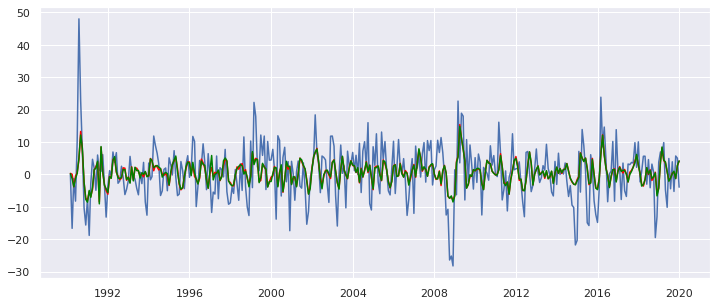

In [ ]:

plt.figure(figsize=(12, 5))
plt.plot(mydatats.WTI_return[1:])
plt.plot(result_wti_ar5_ma3X.fittedvalues, color='red')
plt.plot(result_wti_ar5_ma3X2.fittedvalues, color='green')

plt.show()

**Comparing the mean squared error**

In [ ]:
from sklearn import metrics 

In [ ]:
# measn suqraed error with exogenous var 
# as INR Pct only
metrics.mean_squared_error(mydatats.WTI_return[1:]\
                           ,\
                           result_wti_ar5_ma3X.\
                           fittedvalues )

61.83911878275522

In [ ]:
# measn suqraed error with exogenous var 
# as with INR_pct and NIFTY Index 
metrics.mean_squared_error(mydatats.WTI_return[1:]\
                           ,\
                           result_wti_ar5_ma3X2.\
                           fittedvalues )

61.639478797212426

In [ ]:
# mean squared error without any 
# exogenous variables 
metrics.mean_squared_error(mydatats.WTI_return[1:]\
                           ,\
                           result_wti_ar5_ma3.\
                           fittedvalues)

63.6430280772706

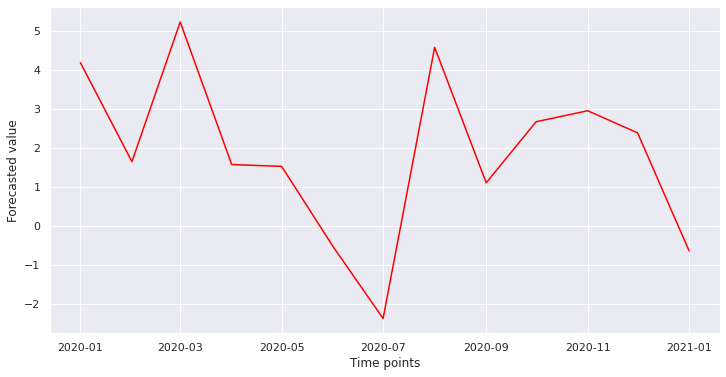

In [ ]:
forecast_ar5_ma3X2 =\
result_wti_ar5_ma3X2.predict(start='01/01/2020',\
                             end='01/01/2021',
                             exog=mydatats[\
                                           ["INR_pct", \
                                           "NIFTY"]][1:])
plt.figure(figsize=(12,6))

plt.plot(forecast_ar5_ma3X2, color="red")
plt.ylabel("Forecasted value")
plt.xlabel("Time points")

plt.show()

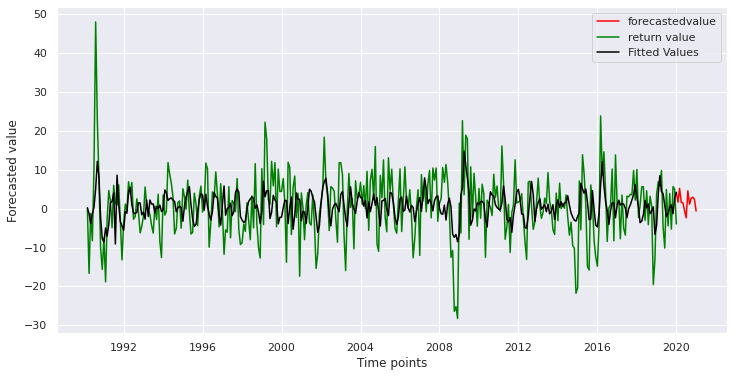

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(forecast_ar5_ma3X2, color="red", label="forecasted\
value")
plt.plot(mydatats.WTI_return[1:], color="green", label=\
         "return value")
plt.plot(result_wti_ar5_ma3X2.fittedvalues, color="black", label=\
         "Fitted Values")
plt.ylabel("Forecasted value")
plt.xlabel("Time points")
plt.legend()
plt.show()

**Analyze the residuals**

In [ ]:
mydatats["resid_ARMX2"] = result_wti_ar5_ma3X2.resid
mydatats["resid_ARMX"] = result_wti_ar5_ma3X.resid

**Testing the normality of the residuals**

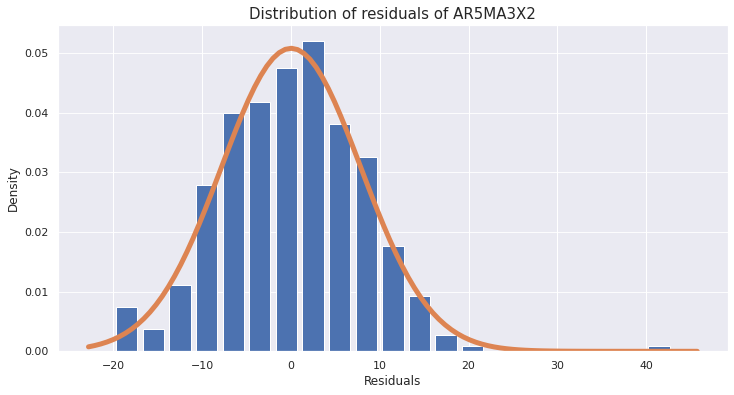

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.hist(mydatats.resid_ARMX2[1:], bins="auto"\
         , density=True, rwidth=0.8\
         , label="Residual Plot")

mu, std = norm.fit(mydatats.resid_ARMX2[1:])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num=100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,  linewidth=5)
plt.grid(axis="y", alpha = 0.9)
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.title("Distribution of residuals of AR5MA3X2", size=15)
plt.show()


These are called family of ARIMA models



**SARIMAX**


In [ ]:
mydata_df = pd.read_csv("seasonal_trend.csv", header=0,\
                        names=["year", "sales"],\
                        parse_dates = [0],\
                        index_col = 0)


mydata_df

,sales
year,
1,203
2,486
3,438
4,816
5,835
...,...
171,67374
172,81184
173,117986


In [ ]:
mydatats_seasonal = pd.Series(mydata_df["sales"].values\
                              ,\
                              index=pd.date_range(start="11/30/2005"\
                                                  ,periods=175,\
                                                  freq="M"))

mydatats_seasonal

2005-11-30       203
2005-12-31       486
2006-01-31       438
2006-02-28       816
2006-03-31       835
               ...  
2020-01-31     67374
2020-02-29     81184
2020-03-31    117986
2020-04-30     43674
2020-05-31     49350
Freq: M, Length: 175, dtype: int64

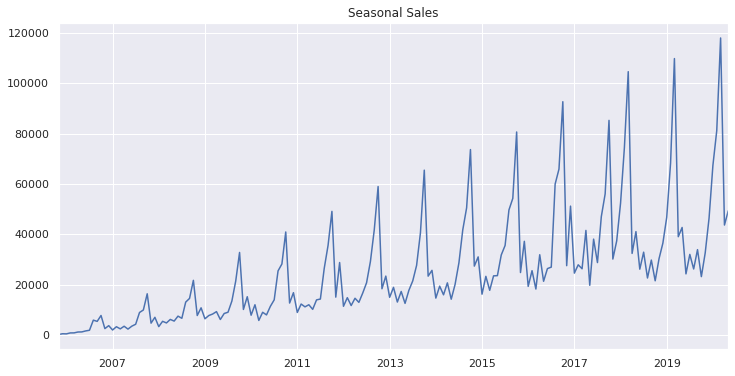

In [ ]:
plt.figure(figsize=(12,6))
mydatats_seasonal.plot()
plt.title("Seasonal Sales")
plt.show()

In [ ]:
len(mydatats_seasonal)

175

In [ ]:
# degress of freedom = Number of lines  - number of lags -2  
sts.adfuller(mydatats_seasonal)


(-0.5415862483212861,
 0.8836425889946258,
 14,
 160,
 {'1%': -3.4718957209472654,
  '10%': -2.5764947265625,
  '5%': -2.8797795410156253},
 3392.0060840316496)

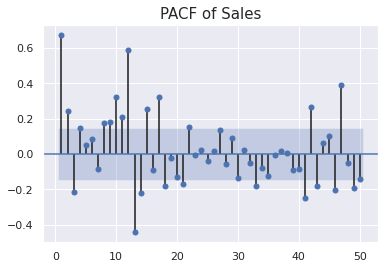

In [ ]:
sgt.plot_pacf(mydatats_seasonal, lags=50, zero= False)
plt.title("PACF of Sales", size=15)
plt.show()
# ACF Will be a wavy pattern, error terms will be positive 
# 

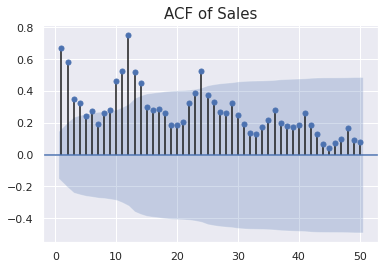

In [ ]:
sgt.plot_acf(mydatats_seasonal, lags=50, zero= False)
plt.title("ACF of Sales", size=15)
plt.show()

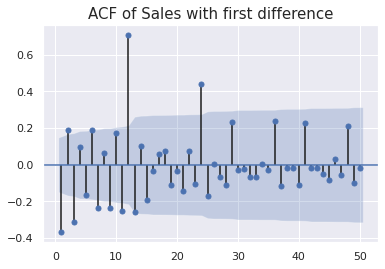

In [ ]:
sgt.plot_acf(mydatats_seasonal.diff().dropna(), lags=50, zero= False)
plt.title("ACF of Sales with first difference", size=15)
plt.show()

In [ ]:
mydatats_seasonal.tail(2)

2020-04-30    43674
2020-05-31    49350
Freq: M, dtype: int64

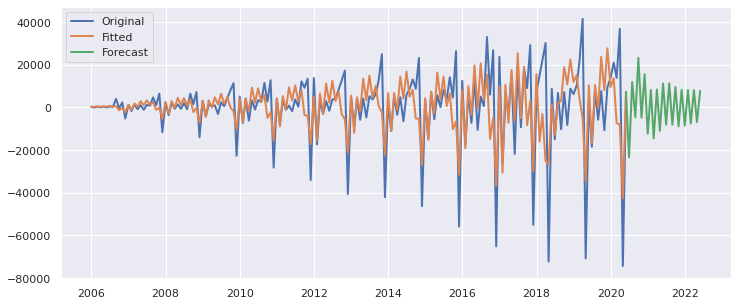

In [ ]:
model_arma = ARMA(mydatats_seasonal.diff().dropna(),\
                  order=(6,2))
result_arma = model_arma.fit()

fcast = result_arma.predict(start="31/05/2020",\
                            end="31/05/2022")

plt.figure(figsize=(12,5))
plt.plot(mydatats_seasonal.diff().dropna(),\
         linewidth=2,\
         label="Original")
plt.plot(result_arma.fittedvalues,\
         linewidth=2,\
         label="Fitted")
plt.plot(fcast,\
         linewidth=2,\
         label="Forecast")
plt.legend()
plt.show()

**SARIMAX** (1,0,2)(2, 0, 1, **5**) 
m = 5: seasonal cycle (m is the month)
Yt = A0 + A1Yt-1 + B1Et-1 + B2Et-2
+
C1(Yt-5 +  A2Yt-6) + C2(Yt-10 + 
A2Yt-11) + D1(Et-5 + B3Et-6 + B3Et-7) + Et


 Heavy weightaged model 

 Over parametric model 


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarimax = SARIMAX(mydatats_seasonal.diff().dropna(),\
                        order=(1,1,1),\
                        seasonal_order=(1,1,1,5)
                        )
result_sarimax = model_sarimax.fit()
print(result_sarimax.summary())

# sigma2 gives overall stability of the model

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  174
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -1908.165
Date:                           Sat, 12 Sep 2020   AIC                           3826.330
Time:                                   06:17:20   BIC                           3841.950
Sample:                               12-31-2005   HQIC                          3832.670
                                    - 05-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3505      0.199     -1.760      0.078      -0.741       0.040
ma.L1         -0.9728      0.128     -7.582

In [ ]:
model_sarimax = SARIMAX(mydatats_seasonal,\
                        order=(6,1,1),\
                        seasonal_order=(2,1,1,5)
                        )
result_sarimax = model_sarimax.fit()
print(result_sarimax.summary())

# sigma2 gives overall stability of the model

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  175
Model:             SARIMAX(6, 1, 1)x(2, 1, 1, 5)   Log Likelihood               -1870.211
Date:                           Sat, 12 Sep 2020   AIC                           3762.422
Time:                                   06:22:36   BIC                           3796.851
Sample:                               11-30-2005   HQIC                          3776.394
                                    - 05-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7138      0.358     -1.996      0.046      -1.415      -0.013
ar.L2         -0.8434      0.265     -3.180